In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=False)
# please show all columns
pd.set_option("display.max_columns", 60)
import seaborn as sns
sns.set()

In [4]:
%matplotlib inline

In [5]:
dftts = pd.read_csv('../local/data/LBNL_openpv_tts_data/ttsclean20180119.csv',
                    parse_dates=['install_date'],
                    index_col='row_id',
                    encoding = 'utf-8', 
                    dtype={'zipcode' : np.object})
dftts.head()

,file_row,data_provider,sysid_dp,sysid_tts,install_date,size_kw,price,appraised_value,cust_type,new_const,tracking,ground_mounted,battery,zipcode,city,county,state,third-party,uinverter,dc_optimizer,cost_per_watt
row_id,,,,,,,,,,,,,,,,,,,,,
1,10108220,California Public Utilities Commission (Curren...,PGE-INT-11328 & CA_ERP_24698,CA-NEM-12257,1998-01-09,2.2824,24500.00,False,RES,False,False,False,False,94107.0,San Francisco,San Francisco,CA,False,False,False,10.734315
2,10107162,California Public Utilities Commission (Curren...,PGE-INT-11220 & CA_ERP_24687,CA-NEM-11180,1998-01-30,1.8504,20555.54,False,RES,False,False,False,False,95949.0,Nevada City,Nevada,CA,False,False,False,11.108701
4,10107618,California Public Utilities Commission (Curren...,PGE-INT-11268 & CA_ERP_24540,CA-NEM-11641,1998-02-04,2.3076,20000.00,False,RES,False,False,False,False,94518.0,Concord,Contra Costa,CA,False,False,False,8.667013
6,10107745,California Public Utilities Commission (Curren...,PGE-INT-11280 & CA_ERP_24429,CA-NEM-11770,1998-04-03,2.3316,30941.00,False,RES,False,False,False,False,94038.0,Moss Beach,San Mateo,CA,False,False,False,13.270286
7,10107787,California Public Utilities Commission (Curren...,PGE-INT-11284 & CA_ERP_24701,CA-NEM-11812,1998-04-30,0.9300,13629.00,False,RES,False,False,False,False,94563.0,Orinda,Contra Costa,CA,False,False,False,14.654839


In [6]:
byDate = dftts.set_index('install_date')

In [7]:
byDate.head()

,file_row,data_provider,sysid_dp,sysid_tts,size_kw,price,appraised_value,cust_type,new_const,tracking,ground_mounted,battery,zipcode,city,county,state,third-party,uinverter,dc_optimizer,cost_per_watt
install_date,,,,,,,,,,,,,,,,,,,,
1998-01-09,10108220,California Public Utilities Commission (Curren...,PGE-INT-11328 & CA_ERP_24698,CA-NEM-12257,2.2824,24500.00,False,RES,False,False,False,False,94107.0,San Francisco,San Francisco,CA,False,False,False,10.734315
1998-01-30,10107162,California Public Utilities Commission (Curren...,PGE-INT-11220 & CA_ERP_24687,CA-NEM-11180,1.8504,20555.54,False,RES,False,False,False,False,95949.0,Nevada City,Nevada,CA,False,False,False,11.108701
1998-02-04,10107618,California Public Utilities Commission (Curren...,PGE-INT-11268 & CA_ERP_24540,CA-NEM-11641,2.3076,20000.00,False,RES,False,False,False,False,94518.0,Concord,Contra Costa,CA,False,False,False,8.667013
1998-04-03,10107745,California Public Utilities Commission (Curren...,PGE-INT-11280 & CA_ERP_24429,CA-NEM-11770,2.3316,30941.00,False,RES,False,False,False,False,94038.0,Moss Beach,San Mateo,CA,False,False,False,13.270286
1998-04-30,10107787,California Public Utilities Commission (Curren...,PGE-INT-11284 & CA_ERP_24701,CA-NEM-11812,0.9300,13629.00,False,RES,False,False,False,False,94563.0,Orinda,Contra Costa,CA,False,False,False,14.654839


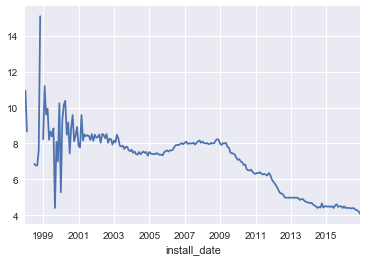

In [11]:
byDate.resample('M').cost_per_watt.median().plot()

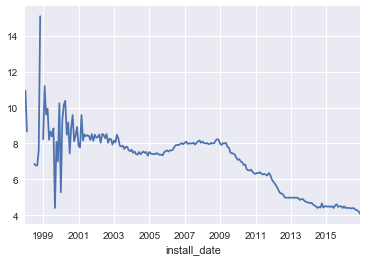

In [15]:
# so I don't have to reindex
dftts.resample('M', on='install_date').cost_per_watt.median().plot()

In [17]:
# so I don't have to reindex but this doesn't work either...
dftts.resample('M', on='install_date').groupby('cust_type').cost_per_watt.median().plot()

TypeError: 'TimeGrouper' object is not callable